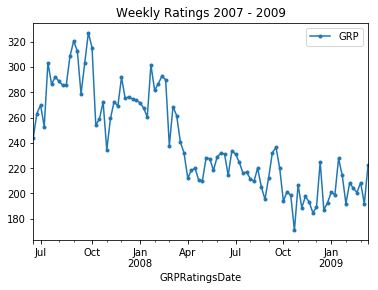

,GRP
GRPRatingsDate,
2009-02-15,204.20
2009-02-22,200.61
2009-03-01,208.56
2009-03-08,191.74
2009-03-15,222.07


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import math

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


df = pd.read_csv("data/ActualRatings_weeklyGRP.csv")
df = df.drop(df.columns[2], axis=1)
split_str = df['GRPRatingsDate'].str.split('(')
df['GRPRatingsDate'] = split_str.str[0]
df['GRPRatingsDate'] = pd.to_datetime(df['GRPRatingsDate'])

df = df.set_index('GRPRatingsDate')
df.plot(style='.-')
plt.title('Weekly Ratings 2007 - 2009')
plt.show()
df.tail()

In [6]:
# Get train test
df_train = df[:'2008-10-26']
df_test = df['2008-11-1':]


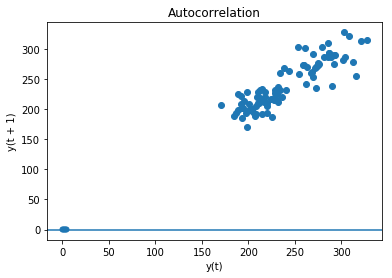

In [7]:
from pandas.plotting import lag_plot
#series = Series.from_csv('daily-minimum-temperatures.csv', header=0)
lag_plot(df)
plt.show()

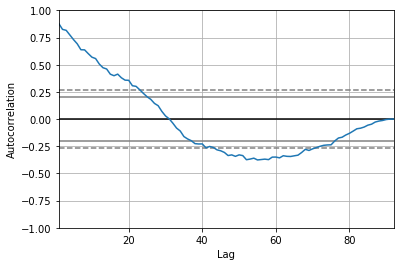

In [8]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df)
plt.show()

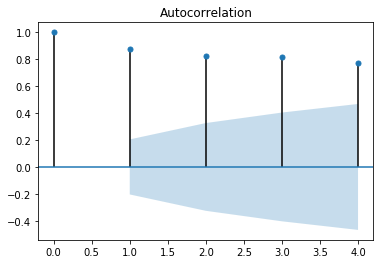

In [9]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df, lags=4)

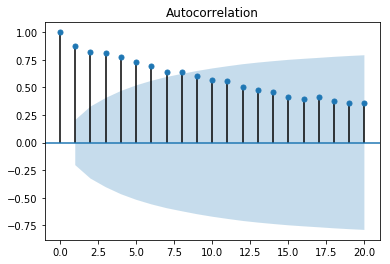

In [10]:
plot_acf(df, lags=20)

#### Create the auto regressive model

In [11]:
from statsmodels.tsa.ar_model import AR

# train autoregression
model = AR(df_train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

Lag: 11
Coefficients: const      1.413652
L1.GRP     0.727900
L2.GRP    -0.107417
L3.GRP     0.335433
L4.GRP     0.040549
L5.GRP    -0.102832
L6.GRP    -0.046191
L7.GRP    -0.087119
L8.GRP     0.130850
L9.GRP    -0.057891
L10.GRP    0.135577
L11.GRP    0.010381
dtype: float64


In [ ]:
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)